In [1]:
import sympy as sym

# Week 12: SymPy I

This week we start working with [SymPy](https://docs.sympy.org/latest/index.html) library for *symbolic computation*. In symbolic computation, mathematical objects are represented exactly, not approximately (recall Exercise 1 of week 9, where we implemented a class of exact rational numbers), and variables in mathematical expressions can be manipulated as abstract symbols without a given value. To get started with SymPy, you can read [this introductory tutorial](https://docs.sympy.org/latest/tutorials/intro-tutorial/index.html).  

## Exercise 1: Basic operations with SymPy

**a)** Use SymPy to factorize the following polynomial:
$$2x^5 - 19x^4 + 58x^3 - 67x^2 + 56x - 48$$

In [3]:
# Define x as a symbol
x = sym.Symbol('x')

# Define the polynomial as a Sympy expression
expr = 2*x**5 - 19*x**4 + 58*x**3 - 67*x**2 + 56*x - 48

# Factorize the polynomial (over integers)
sym.factor(expr)

(x - 4)**2*(2*x - 3)*(x**2 + 1)

**b)** Implement a function ```uparrow(x, n)```, where $x$ is a SymPy symbol and $n$ is an integer, which returns

$${\underbrace{x^{{}^{.^{.^{.^x}}}}}_\text{n copies of x}}$$

as a SymPy expression. Use the function with argument $n=4$ to define the following expression: 

$$x^{{}^{x^{x^{x}}}}$$

Then calculate the value of the above expression symbolically for $x=2$ (use ```subs``` method). 

In [15]:
def uparrow(x, n):
    expr = x
    for i in range(n - 1):
        expr = x**expr
    return expr

In [14]:
x = sym.Symbol('x')
n = 4

expr = uparrow(x,n)

expr

x**(x**(x**x))

In [6]:
# We use expr.subs method to specify the value of x (x=2) 
expr.subs({x: 2})

65536

**c)** Implement a function ```compose(f,n)```, which composes a SymPy expression $f$ with itself $n$ times, i.e., returns ${\underbrace{f(f(\dots f(x))\dots )}_\text{n copies of f}}$. Test your function using expression $f(x)=x^2$ and $n=5$.

In [16]:
def compose(expr, n):
    composed_expr = expr
    for i in range(n):
        composed_expr = composed_expr.subs(x, expr)
    return composed_expr

In [17]:
expr = x**2
n = 5

compose(expr, n)

x**64

**d)** Consider the following sequence of functions 

$$f_n(x) = \dfrac{x}{n}\exp(-\dfrac{x}{n})$$

Plot $f_1, f_2, \dots, f_{20}$ for $x\in[0,10]$ in the same graph (use ```sympy.plot``` for plotting).

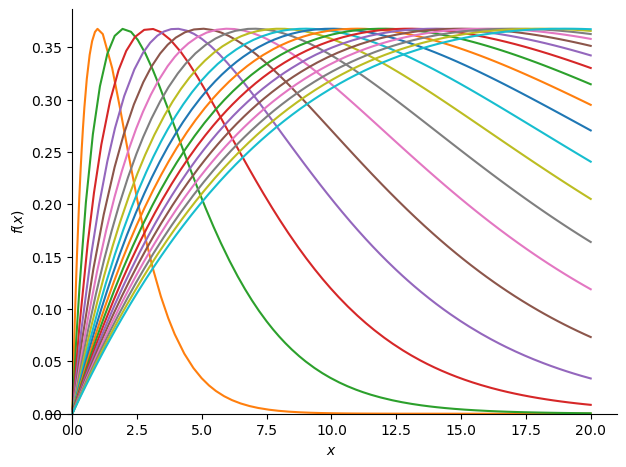

In [13]:
x,n = sym.symbols(('x','n'))

# We define f as a sympy expression 
f = (x/n)*sym.exp(-x/n)

# We use f.subs method to specify the value of n 
# Note: We can use *[] to pass all the elements of a list as arguments of sym.plot
# i.e. sym.plot(*[x**2, x**3]) is equivalent to sym.plot(x**2, x**3)
sym.plot(*[f.subs({n:i}) for i in range(20)], (x,0,20))
